In [1]:
#  Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
# reading the csv file of House Prices
data = pd.read_csv('House Prices.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# converting the data into pandas dataframe
house_data = pd.DataFrame(data)
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Cleaning the dataset

In [4]:
# Data's overview
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Information about data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# converting the data types of Price, bedrooms, bathrooms, floors into int and street, city, statezip, country into string
house_data['price']     = house_data['price'].astype('int64')
house_data['bedrooms']  = house_data['bedrooms'].astype('int64')
house_data['bathrooms'] = house_data['bathrooms'].astype('int64')
house_data['floors']    = house_data['floors'].astype('int64')
house_data['street']    = house_data['street'].astype('string')
house_data['city']      = house_data['city'].astype('string')
house_data['statezip']  = house_data['statezip'].astype('string')
house_data['country']   = house_data['country'].astype('string')

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   string
 15  city           4600 non-null   string
 16  statezip       4600 non-null   string
 17  country        4600 non-null   string
dtypes: int64(13), object(1), str

In [8]:
# dropping the duplicated of the house data
house_data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [9]:
# Describing the data and getting the mathemitical information
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [10]:
# Checking for the price in the house data which is 0
(house_data.price == 0).sum()

49

In [11]:
# repalcing the house data price with NAN values
house_data['price'].replace(0,np.nan,inplace = True)

In [12]:
# checking for the null values
house_data.isna().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [13]:
# dropping the null values
house_data.dropna(inplace = True)
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [14]:
# converting the datatype of the date column to date
house_data['date']  = pd.to_datetime(house_data['date'])
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
# checking correlation between variables
house_data.corr()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.645209,0.875657,0.219193,0.516264,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


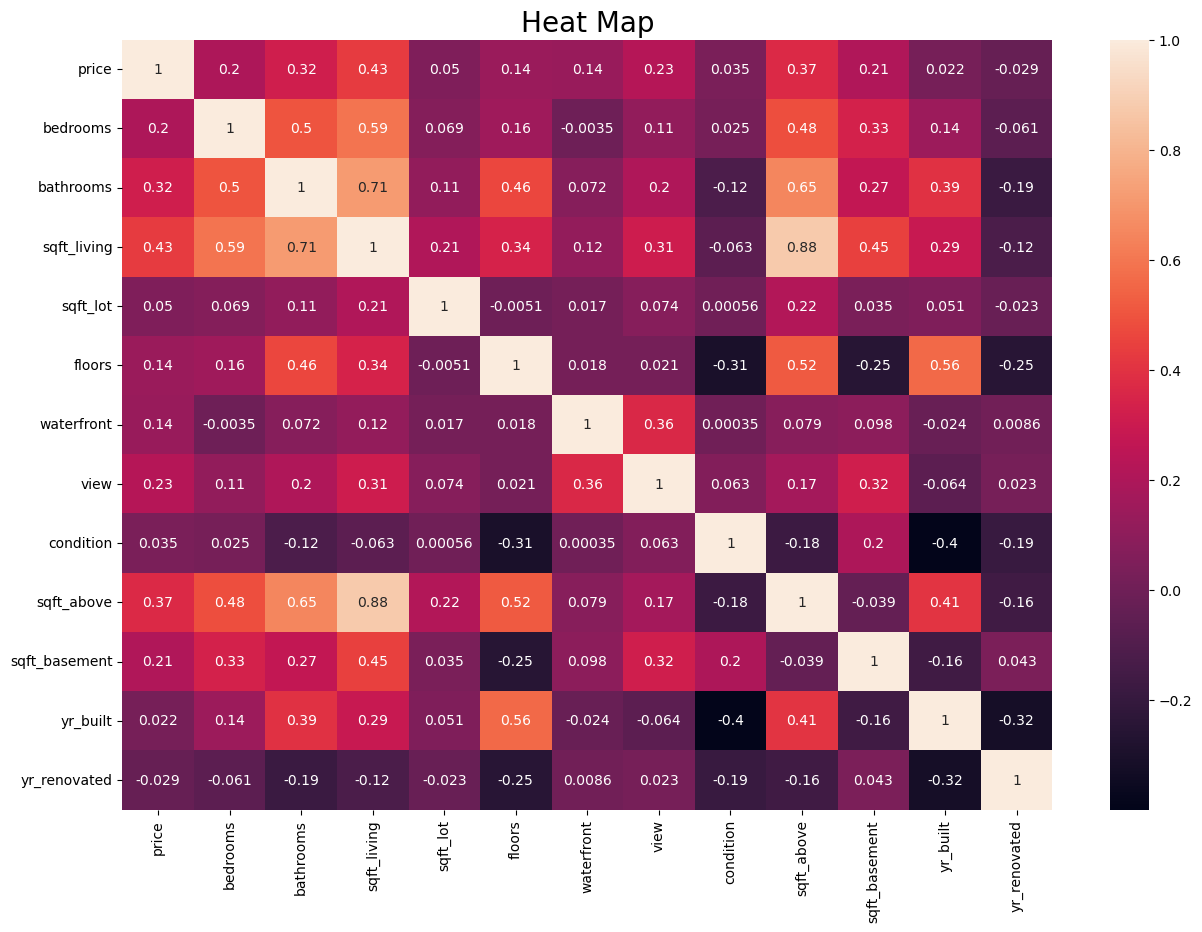

In [16]:
# plotting head map of correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True)
plt.title('Heat Map',size = 20)
plt.yticks(rotation = 0)
plt.show()

C:\Users\yashk\AppData\Local\Temp\ipykernel_9976\3751533153.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data["price"])


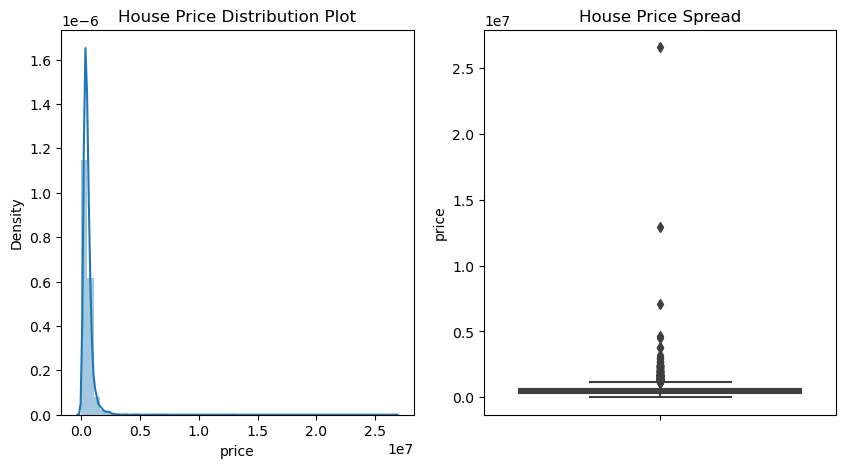

In [17]:
# Plots for the price distribution
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(house_data["price"])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=house_data["price"])

plt.show()

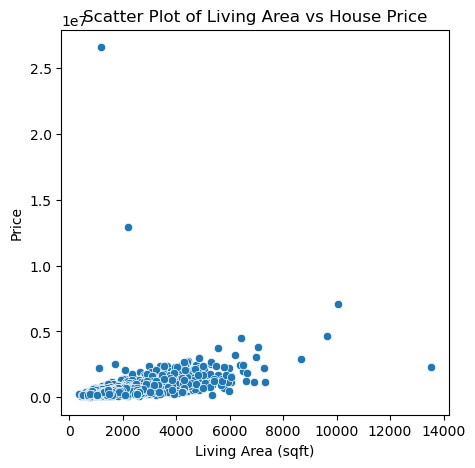

In [18]:
#scatterplot
# Create scatter plot of sq_living vs price
plt.figure(figsize=(5, 5))
sns.scatterplot(x='sqft_living', y='price', data=house_data)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Scatter Plot of Living Area vs House Price')
plt.show()

In [19]:
#Scatter plots was used to visualize the relationship between two variables.
#we used the scatter function in Matplotlib or the scatterplot function in Seaborn to create scatter plots.
#The scatter plot created in the code visualizes the relationship between living area (in square feet) and house prices in the data dataset.
#It allows for a quick assessment of the trend between living area and house prices, with an upward trend indicating a positive correlation.
#The plot provides insights into the potential relationship between living area and house prices,
#allowing for further analysis of any patterns or outliers in the data.

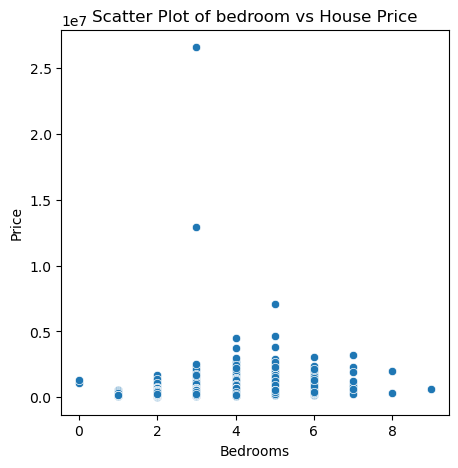

In [20]:
# Create scatter plot of bedrooms vs price
plt.figure(figsize=(5, 5))
sns.scatterplot(x='bedrooms', y='price', data=house_data)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of bedroom vs House Price')
plt.show()

In [21]:
#The scatter plot will have data points scattered across the plot area, with each data point representing a house in the dataset.
#The x-axis will show the number of bedrooms, and the y-axis will show the corresponding house prices.
#The xlabel, ylabel, and title provide labels for the x-axis, y-axis, and the title of the plot, respectively.
#The plt.show() function is used to display the plot.

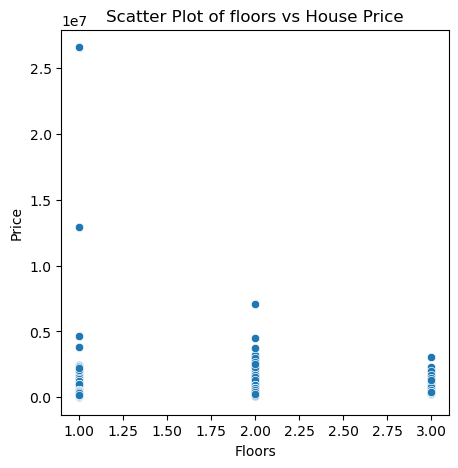

In [22]:
#Create scatter plot of Floors vs price
plt.figure(figsize=(5, 5))
sns.scatterplot(x='floors', y='price', data=house_data)
plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Scatter Plot of floors vs House Price')
plt.show()

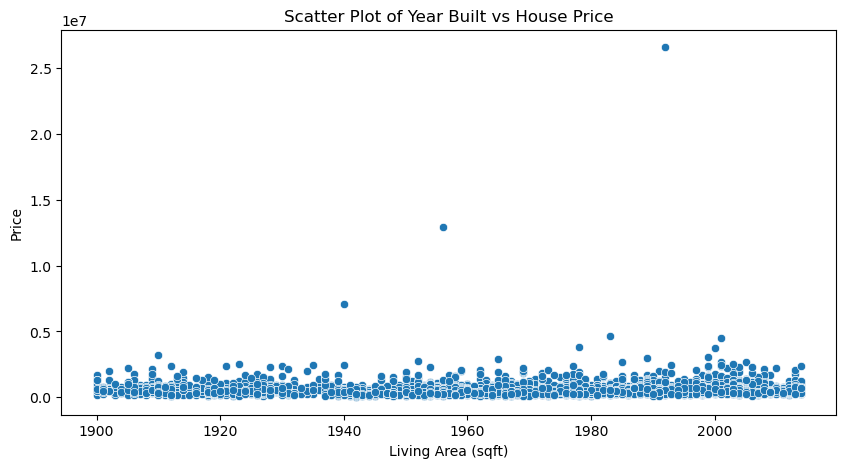

In [23]:
# Create scatter plot of year built vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='yr_built', y='price', data=house_data)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Scatter Plot of Year Built vs House Price')
plt.show()

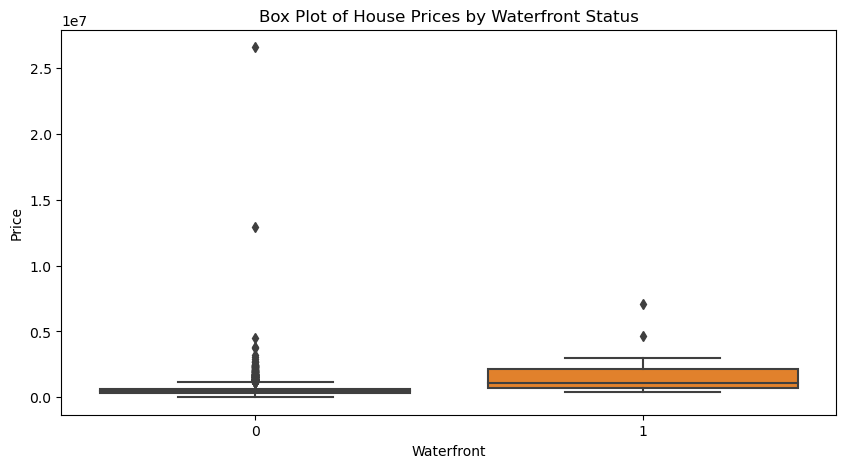

In [24]:
#BoxPlot
# Create box plot of house prices by waterfront status
plt.figure(figsize=(10, 5))
sns.boxplot(x='waterfront', y='price', data=house_data)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Box Plot of House Prices by Waterfront Status')
plt.show()

In [25]:
#The box plot will have two boxes side by side, one for each waterfront status (0 and 1), and will display the distribution of house prices within each group.
#The boxes represent the interquartile range (IQR) of the data, with the box extending from the 25th percentile (Q1) to the 75th percentile (Q3).
#The line inside the box represents the median (Q2) of the data. The whiskers above and below the box represent the range of data within 1.5 times the IQR,
#and any data points beyond this range are plotted as individual points (outliers).
#The x-axis will show the waterfront status (0 or 1), and the y-axis will show the house prices.
#The xlabel, ylabel, and title provide labels for the x-axis, y-axis, and the title of the plot, respectively.

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

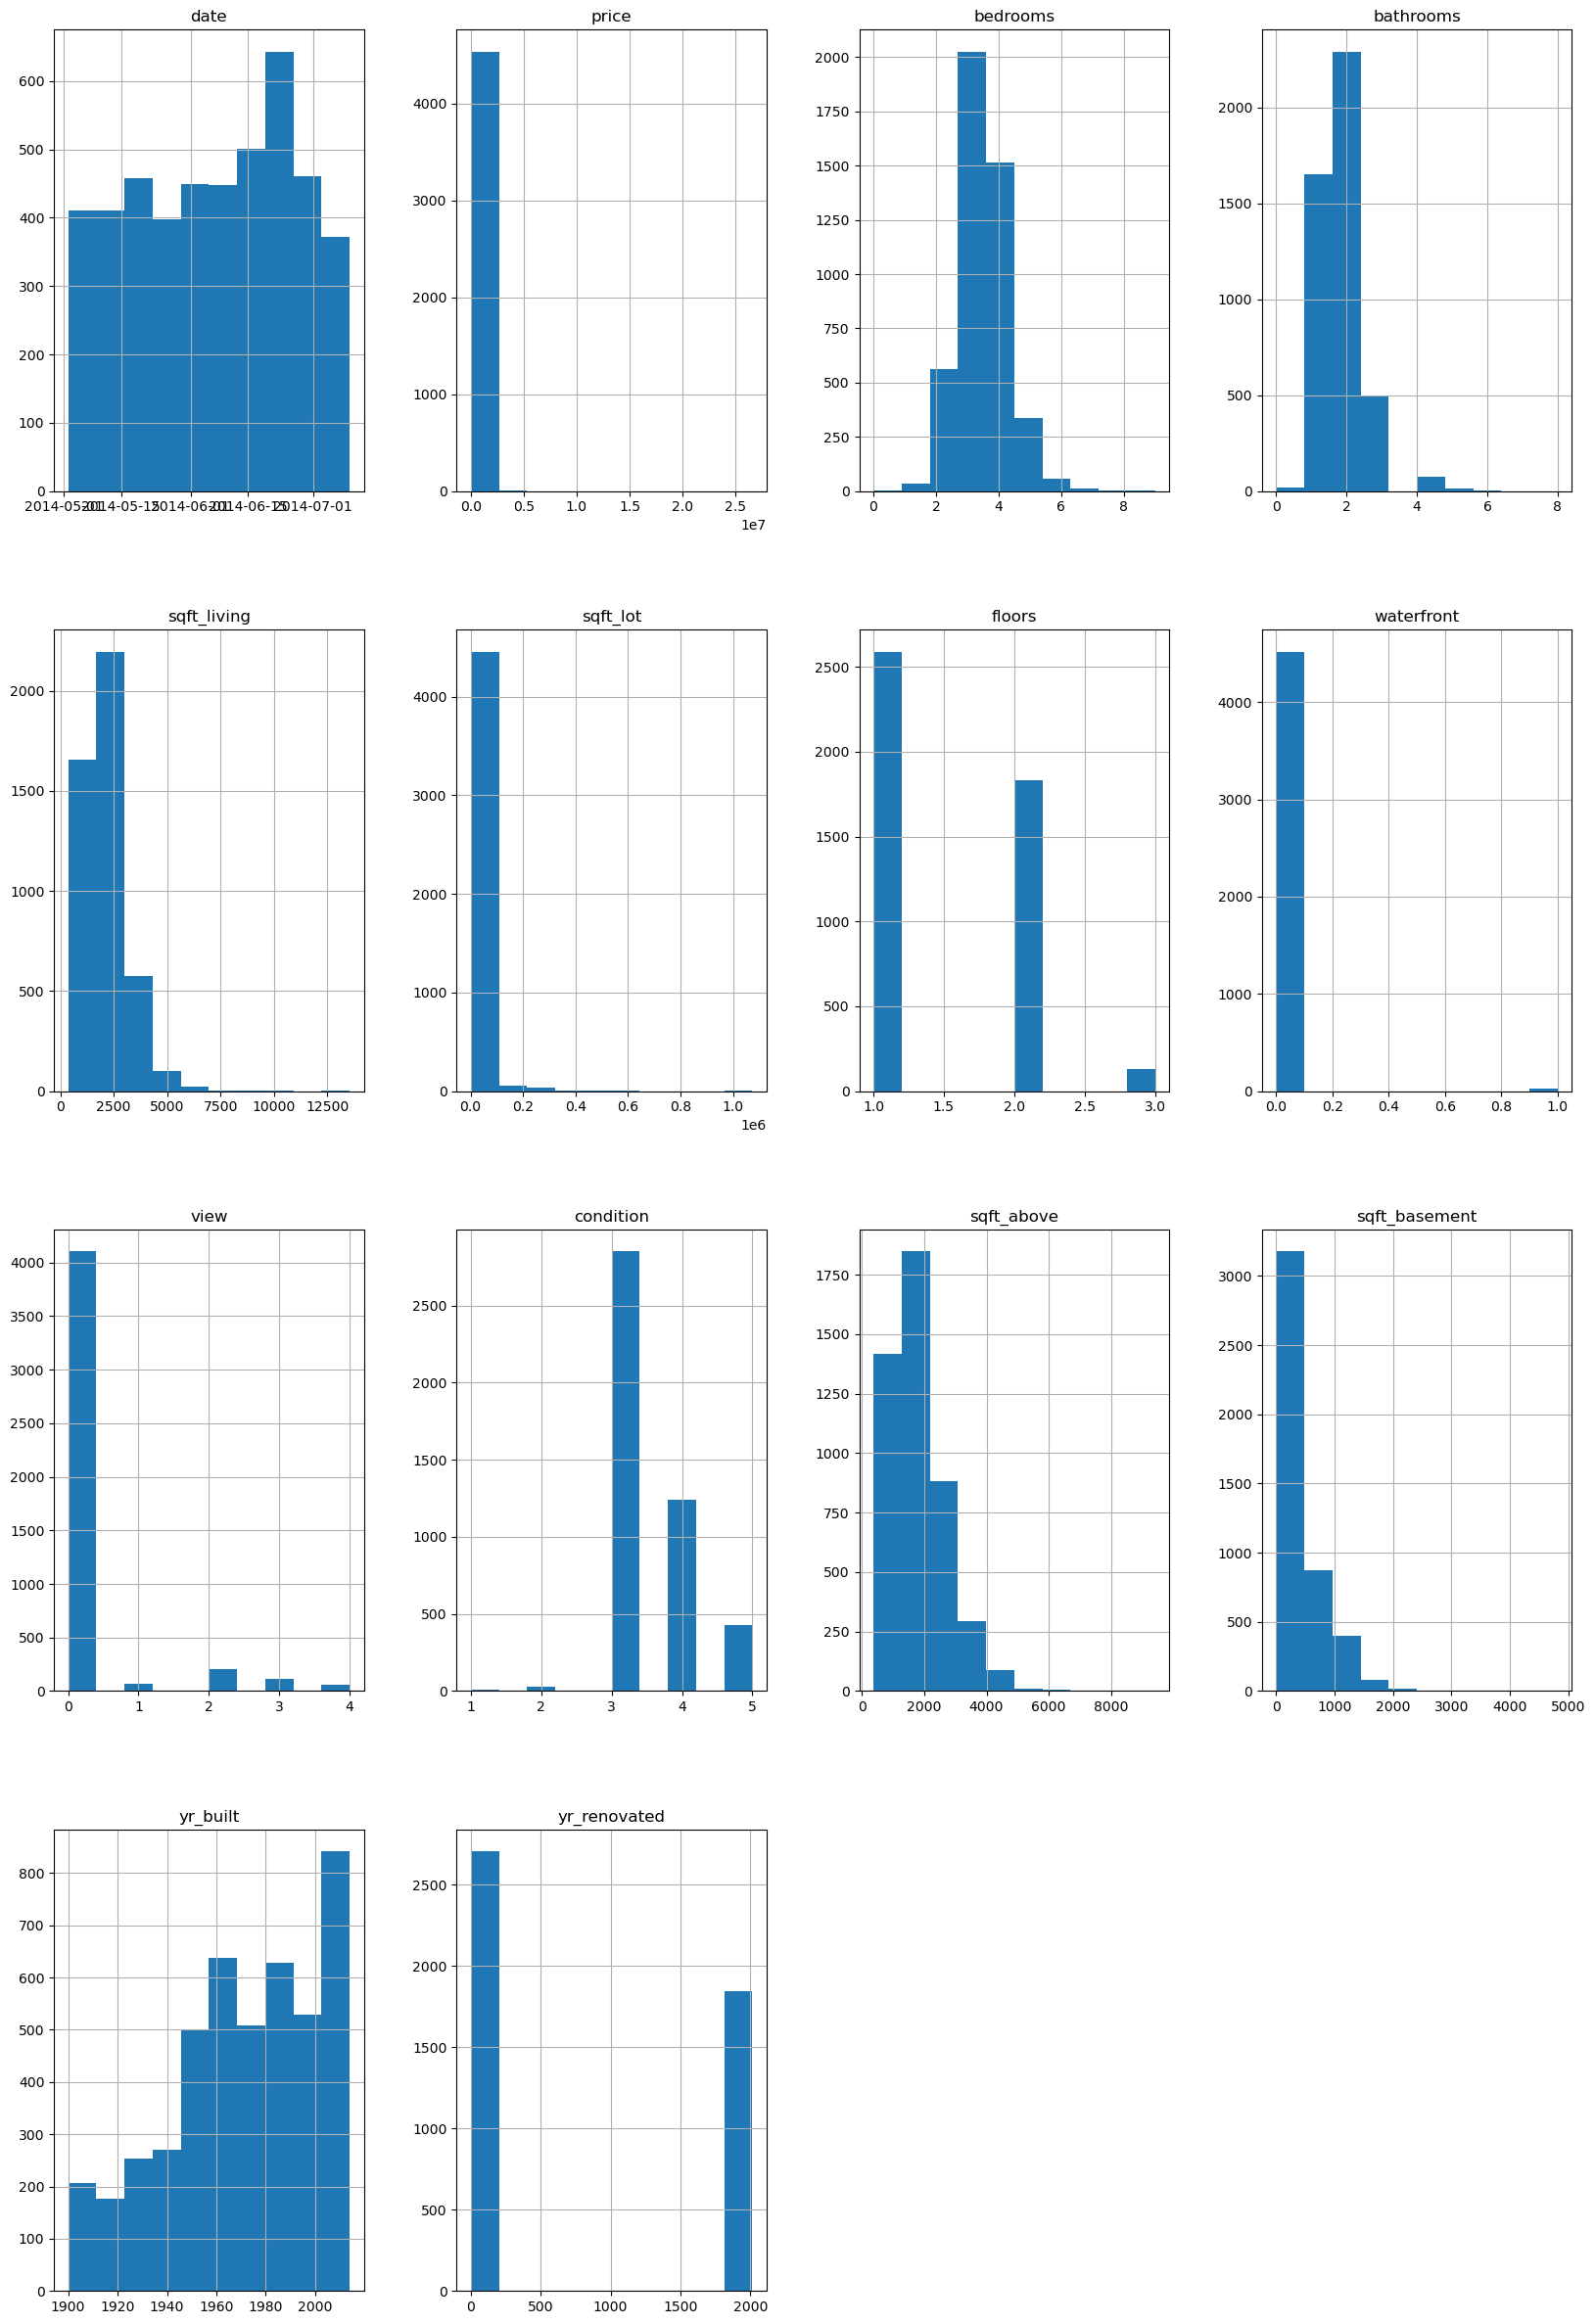

In [26]:
house_data.hist(figsize=(20,30))

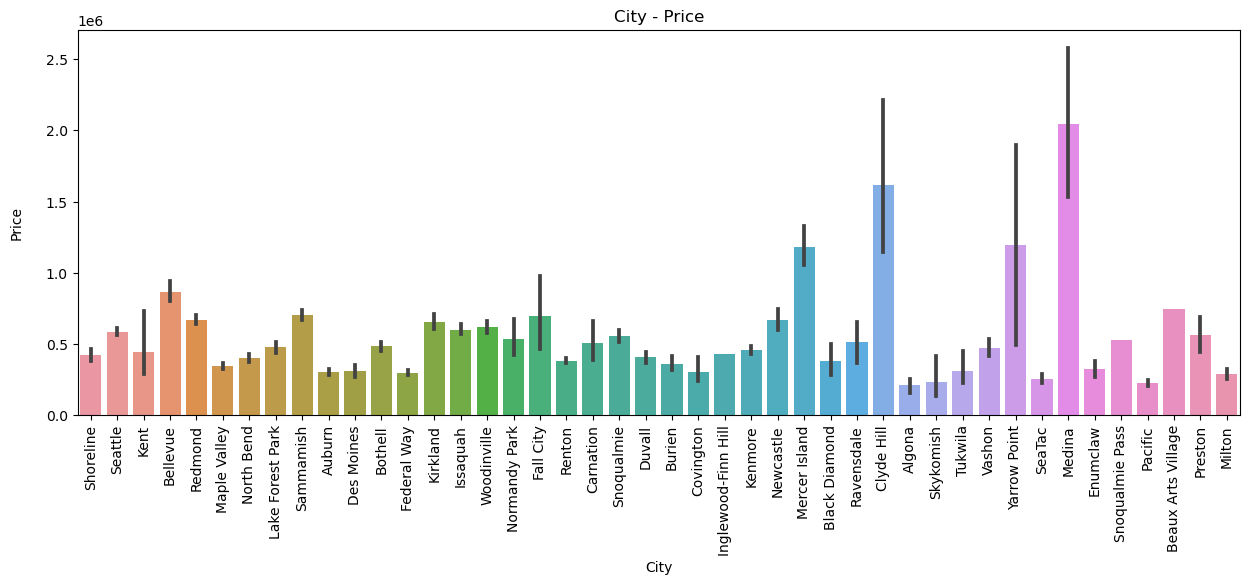

In [27]:
# plotting the graph of house price per city
plt.figure(figsize=(15, 5))
sns.barplot(x = house_data['city'], y = house_data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

In [28]:
house_data.nunique(axis = 0)

date               70
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [29]:
# creating dummy values for all the city as per the price column
house = pd.get_dummies(house_data, columns=['city'],prefix = ['city'])
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,...,0,1,0,0,0,0,0,0,0,0


# Hypothesis Testing

In [30]:
waterfront_group = house_data[house_data["waterfront"]==1]["price"]
non_waterfront_group = house_data[house_data["waterfront"]==0]["price"]
# perfrom t-test
t_stat, p_value = ttest_ind(waterfront_group,non_waterfront_group)

# check the p-value to determine if the null hypothesis should be rejected or not
if p_value<0.05:
    print("Reject null hypothesis: There is a significant difference in house prices between waterfront and non-waterfront properties.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in house prices between waterfront and non-waterfront properties.")

Reject null hypothesis: There is a significant difference in house prices between waterfront and non-waterfront properties.


In [31]:
#we are using the ttest_ind function from the scipy.stats module to perform an independent two-sample t-test.
#The null hypothesis is that there is no significant difference in house prices between waterfront and non-waterfront properties.
#If the p-value is less than the significance level (typically set to 0.05),
#we reject the null hypothesis and conclude that there is a significant difference in house prices between the two groups.
#Otherwise, if the p-value is greater than the significance level,
#we fail to reject the null hypothesis and conclude that there is no significant difference in house prices between the two groups.

# A/B testing

In [32]:
#Extract two groups for A/B testing (example: houses with 3 bedrooms vs houses with 4 bedrooms)
group_a = house_data[house_data['bedrooms'] == 3]['price']
group_b = house_data[house_data['bedrooms'] == 4]['price']
# Perform t-test
t_stat, p_value = ttest_ind(group_a, group_b)
# Check the p-value to determine if the null hypothesis should be rejected or not
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in house prices between houses with 3 bedrooms and houses with 4 bedrooms.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in house prices between houses with 3 bedrooms and houses with 4 bedrooms.")

Reject null hypothesis: There is a significant difference in house prices between houses with 3 bedrooms and houses with 4 bedrooms.


In [33]:
#we are using the ttest_ind function from the scipy.stats module to perform an independent two-sample t-test to compare the house prices
#between two groups of houses with different numbers of bedrooms (e.g., 3 bedrooms and 4 bedrooms).
#The null hypothesis is that there is no significant difference in house prices between the two groups.
#If the p-value is less than the significance level (typically set to 0.05),
#we reject the null hypothesis and conclude that there is a significant difference in house prices between the two groups.
#Otherwise, if the p-value is greater than the significance level,
#we fail to reject the null hypothesis and conclude that there is no significant difference in house prices between the two groups.

In [34]:
# dropping the all the string and date type data
house = house.drop(['date', 'street', 'statezip', 'country'],axis = 1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.0,3,1,1510,6360,1,0,0,4,1510,...,0,1,0,0,0,0,0,0,0,0
4596,534333.0,3,2,1460,7573,2,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,416904.0,3,2,3010,7014,2,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400.0,4,2,2090,6630,1,0,0,3,1070,...,0,1,0,0,0,0,0,0,0,0


# Normalizing

In [35]:
# Creating the instance of MinMaxscaler with a feature range of [0,1] and applying it to house data
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(house), columns = house.columns)
normal.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,0.107301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,0.331858,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,0.056416,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,0.108407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,0.258850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,0.127212,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [36]:
# Except price all the columns are predicted variables
# price is the response variabel
x = normal.drop("price",axis = 1)
y = pd.DataFrame(normal['price'])

In [37]:
# Using NearestNeighbours in order to find the nearest neighbours of data points. Storing the distance and Indices of the nearest neighbours and sorting them
nbrs = NearestNeighbors(n_neighbors=3).fit(x)
neigh_dist, neigh_ind = nbrs.kneighbors(x)
sort_neigh_dist = np.sort(neigh_dist,axis = 0)

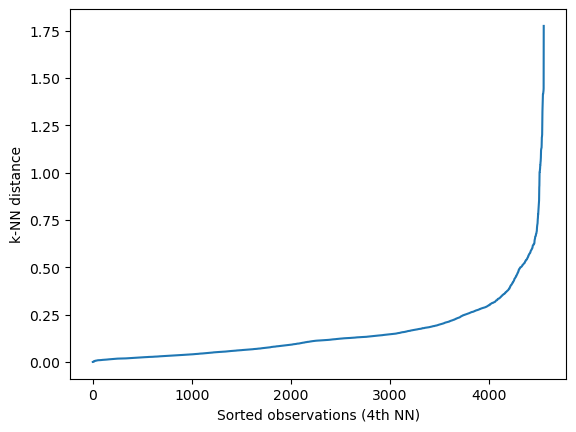

In [38]:
# Soriting the neighbors and plotting them
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [39]:
# Performing Density based Spatial CLustering of application with noise in order to identify areas of high density and separting it from low density.

# Creating an instance of DBSCAN with eps set to 0.9 and min_sample to 3 fit them X array


clusters = DBSCAN(eps=0.9, min_samples=3).fit(x)
clusters.labels_

array([ 0,  1,  2, ..., 24,  1, 35], dtype=int64)

In [40]:

x["noise"] = clusters.labels_
y["noise"] = clusters.labels_

In [41]:
# Removing the noise from the actual dataset
x = x[x.noise>-1]
y = y[y.noise>-1]
x.drop('noise', inplace = True, axis=1)
y.drop('noise', inplace = True, axis=1)


In [42]:
# Spliitng the data and allocating 20% testing and rest for the training
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [43]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3606, 56)
(3606, 1)
(902, 56)
(902, 1)


In [44]:
# performing linear regression model and predicting the price of the house
model = LinearRegression()
results = model.fit(X_train, Y_train)

Y_pred = results.predict(X_test)

In [45]:
results.intercept_

array([1.56738168e+09])

In [46]:
results.coef_

array([[-1.15195348e-02,  1.77506134e-02, -2.10535023e+10,
        -5.37958464e-03, -1.84695158e-03,  4.79875277e-03,
         9.32908810e-03,  6.44491444e-03,  1.44513030e+10,
         7.70523014e+09, -2.66742706e-03,  3.70025635e-04,
        -1.56738168e+09, -1.56738168e+09, -3.90798467e+08,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.75676768e+07, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
         1.05335569e+05, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09,  7.69504294e+02,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09, -1.56738168e+09, -1.56738168e+09,
        -1.56738168e+09,  0.00000000e+00, -1.56738168e+0

In [47]:
# Evalutions

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error     :  0.004348690279684073
Mean Squared Error      :  4.0037832754801866e-05
Root Mean Squared Error :  0.006327545555332009
R2 Score                :  0.7634109391855255


In [48]:
# Accurancy of the model is really good to predict value of the house price
Y_pred

array([[0.00967479],
       [0.01922011],
       [0.00676751],
       [0.01614308],
       [0.0383513 ],
       [0.02107573],
       [0.01045299],
       [0.02682757],
       [0.016536  ],
       [0.02369952],
       [0.04502749],
       [0.01088023],
       [0.01352143],
       [0.01460195],
       [0.01948643],
       [0.0381453 ],
       [0.03371501],
       [0.01921701],
       [0.01230979],
       [0.00573754],
       [0.01071811],
       [0.01555657],
       [0.01844287],
       [0.0160408 ],
       [0.01632214],
       [0.01196647],
       [0.01250052],
       [0.016855  ],
       [0.0298636 ],
       [0.01136804],
       [0.02254367],
       [0.00338149],
       [0.02575707],
       [0.02202058],
       [0.02833629],
       [0.04754186],
       [0.01244855],
       [0.02159715],
       [0.01452279],
       [0.02235818],
       [0.01042557],
       [0.02480054],
       [0.01908278],
       [0.02448201],
       [0.03250241],
       [0.02806592],
       [0.03575206],
       [0.003

In [49]:
print(results.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'